In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../data/clean_tweet_data.csv")

In [12]:
print('Count of columns in the data is:  ', data.shape[1])
print('Count of rows in the data is:  ', data.shape[0])

Count of columns in the data is:   21
Count of rows in the data is:   15174


In [6]:
list(data.columns)

['Unnamed: 0',
 'created_at',
 'status',
 'source',
 'original_text',
 'clean_text',
 'sentiment',
 'polarity',
 'subjectivity',
 'lang',
 'favorite_count',
 'retweet_count',
 'original_author',
 'screen_count',
 'followers_count',
 'friends_count',
 'possibly_sensitive',
 'hashtags',
 'user_mentions',
 'place',
 'place_coord_boundaries']

In [7]:
data.groupby(["original_author"]).count().sort_values("original_text", ascending=False)

,Unnamed: 0,created_at,status,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
original_author,,,,,,,,,,,,,,,,,,,,
zaizaiUmar,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,36,22,29,50,0
BirchGold,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,0,50,0
GETAnalysis,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,48,41,1,50,0
Londonwanderer2,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,20,30,43,0,0
MaatWes,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,7,9,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZeeOdisha,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
TNNavbharat,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
TamilsToday,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [8]:
data[["clean_text", "sentiment"]].groupby(["sentiment"]).count()

,clean_text
sentiment,
-1,6951
0,2445
1,5754


In [9]:
df_pos_neg = data.loc[(data["sentiment"] == 1) | (data["sentiment"] == 0)][["clean_text", "sentiment"]]
df_pos_neg.reset_index(drop=True, inplace=True)
df_pos_neg.head()

,clean_text,sentiment
0,RT the year yield be tell we that there be a h...,1
1,RT German mortgage rate go from to can you hea...,1
2,RT rate rise until something break be anything...,0
3,RT buy opportunity like this only occur every ...,0
4,RT welcome to September bond market test what ...,1


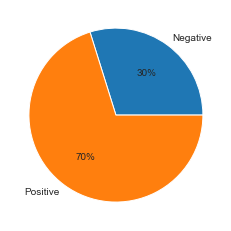

In [25]:
plt.pie(df_pos_neg.groupby(["sentiment"]).size(), labels=["Negative", "Positive"], autopct='%.0f%%')
plt.show()

In [26]:
import nltk
import numpy as np
import sklearn as sk
from wordcloud import WordCloud, STOPWORDS

In [27]:
positive_tweets = df_pos_neg.loc[df_pos_neg["sentiment"] == 1]["clean_text"]
positive_tweets.head()

0    RT the year yield be tell we that there be a h...
1    RT German mortgage rate go from to can you hea...
4    RT welcome to September bond market test what ...
5    RT global growth optimism at all time low we s...
6    RT this be the most important chart in the wor...
Name: clean_text, dtype: object

In [37]:
positive_text = " ".join(str(positive_tweet) for positive_tweet in positive_tweets)

In [38]:
custom_stopwords = ['rt', 'amp']
STOP_WORDS = STOPWORDS.union(custom_stopwords)

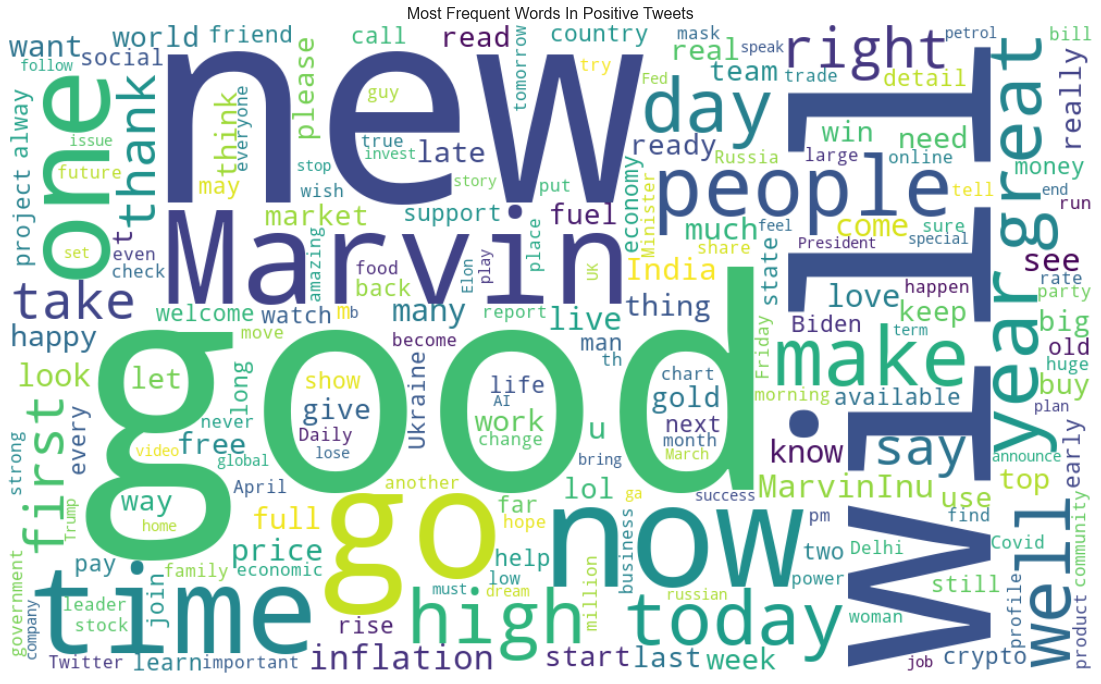

In [39]:
word_cloud = WordCloud(width=1000, height=600, collocations=False, background_color="white", stopwords=STOP_WORDS).generate(positive_text)
plt.figure(figsize=(20, 12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Frequent Words In Positive Tweets', fontsize=16)
plt.show()